<a href="https://colab.research.google.com/github/Sagnik220/Liver-Disease-PyCARET/blob/main/Liver_Disease_PyCARET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q pycaret

     |████████████████████████████████| 266kB 6.5MB/s 
     |████████████████████████████████| 112kB 9.9MB/s 
     |████████████████████████████████| 2.0MB 8.5MB/s 
     |████████████████████████████████| 1.7MB 26.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 256kB 41.6MB/s 
     |████████████████████████████████| 174kB 47.3MB/s 
     |████████████████████████████████| 1.4MB 46.8MB/s 
     |████████████████████████████████| 81kB 8.7MB/s 
     |████████████████████████████████| 276kB 39.2MB/s 
     |████████████████████████████████| 14.2MB 264kB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 6.8MB 31.8MB/s 
     |████████████████████████████████| 112kB 51.9MB/s 
     |████████████████████████████████| 1.1MB 44.0MB/s 
     |████████████████████████████████| 645kB 34.4MB/s

In [20]:
import pandas as pd

In [81]:
data=pd.read_csv("/content/indian_liver_patient.csv")

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [83]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [84]:
data['Dataset'].value_counts()

1    416
2    167
Name: Dataset, dtype: int64

In [85]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [86]:
data['Albumin_and_Globulin_Ratio'] = data['Albumin_and_Globulin_Ratio'].fillna(0.947064)

In [87]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [88]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [90]:
def preprocessing(data):
  data['Gender']=data['Gender'].apply(lambda x: 1 if x=='Male' else 0)
  data['Dataset']=data['Dataset'].apply(lambda x:0 if x==1 else 1)

  return data

In [91]:
data=preprocessing(data)

In [92]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,0
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,0
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,0
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,0
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,0


In [93]:
data['Dataset'].value_counts()

0    416
1    167
Name: Dataset, dtype: int64

In [94]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,0.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [95]:
from pycaret.classification import *
s = setup(data=data, target = 'Dataset')

,Description,Value
0,session_id,2133
1,Target,Dataset
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(583, 11)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,1
8,Ordinal Features,False
9,High Cardinality Features,False


In [96]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7476,0.7836,0.4340,0.6198,0.5018,0.3418,0.3564,0.463
ridge,Ridge Classifier,0.7184,0.0000,0.1821,0.5110,0.2596,0.1562,0.1869,0.014
rf,Random Forest Classifier,0.7180,0.7554,0.4282,0.5560,0.4699,0.2858,0.2974,0.514
lightgbm,Light Gradient Boosting Machine,0.7180,0.7263,0.4615,0.5490,0.4883,0.3006,0.3091,0.087
lda,Linear Discriminant Analysis,0.7160,0.7495,0.2231,0.5731,0.3094,0.1791,0.2125,0.017
lr,Logistic Regression,0.7159,0.7858,0.3628,0.5573,0.4289,0.2530,0.2684,0.398
gbc,Gradient Boosting Classifier,0.6791,0.7139,0.4269,0.4647,0.4410,0.2184,0.2207,0.109
ada,Ada Boost Classifier,0.6766,0.7162,0.4667,0.4673,0.4637,0.2331,0.2350,0.106
knn,K Neighbors Classifier,0.6718,0.7000,0.3853,0.4371,0.4066,0.1831,0.1846,0.118
dt,Decision Tree Classifier,0.6398,0.5818,0.4404,0.4156,0.4145,0.1589,0.1667,0.016


In [98]:
print(best_model)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=2133, verbose=0,
                     warm_start=False)


In [112]:
et_model=create_model('et',fold=30)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7143,0.5000,0.2500,0.5000,0.3333,0.1765,0.1936
1,0.8571,0.9125,0.5000,1.0000,0.6667,0.5882,0.6455
2,0.8571,0.9000,0.5000,1.0000,0.6667,0.5882,0.6455
3,0.7143,0.7125,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.6429,0.6250,0.2500,0.3333,0.2857,0.0541,0.0550
5,0.5714,0.6375,0.2500,0.2500,0.2500,-0.0500,-0.0500
6,0.8571,0.9000,0.7500,0.7500,0.7500,0.6500,0.6500
7,0.6429,0.7250,0.2500,0.3333,0.2857,0.0541,0.0550
8,0.8571,0.8500,0.7500,0.7500,0.7500,0.6500,0.6500
9,0.7143,0.8500,0.2500,0.5000,0.3333,0.1765,0.1936


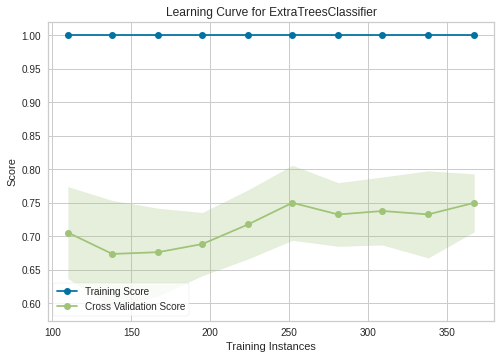

In [114]:
plot_model(et_model,plot='learning')

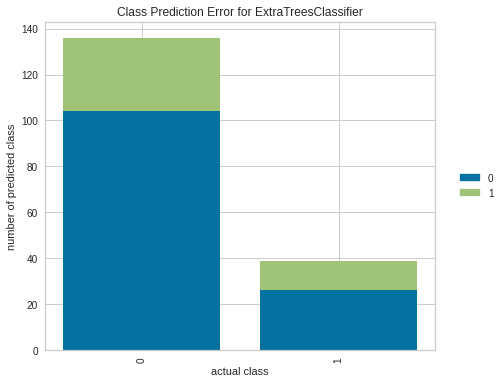

In [115]:
plot_model(et_model,plot='error')

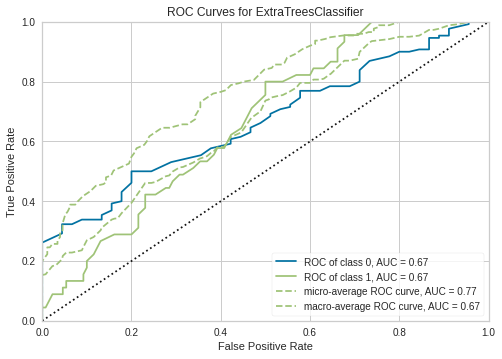

In [116]:
plot_model(et_model,plot='auc')

In [119]:
et_model=tune_model(et_model,optimize='Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7073,0.7040,0.0,0.0,0.0,0.0,0.0
1,0.7073,0.7557,0.0,0.0,0.0,0.0,0.0
2,0.7073,0.7902,0.0,0.0,0.0,0.0,0.0
3,0.7073,0.8592,0.0,0.0,0.0,0.0,0.0
4,0.7073,0.7270,0.0,0.0,0.0,0.0,0.0
5,0.7073,0.7701,0.0,0.0,0.0,0.0,0.0
6,0.6829,0.6786,0.0,0.0,0.0,0.0,0.0
7,0.6829,0.7445,0.0,0.0,0.0,0.0,0.0
8,0.7000,0.8452,0.0,0.0,0.0,0.0,0.0
9,0.7000,0.7649,0.0,0.0,0.0,0.0,0.0


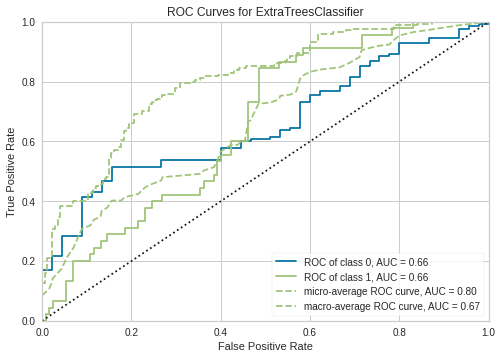

In [120]:
plot_model(et_model,plot='auc')

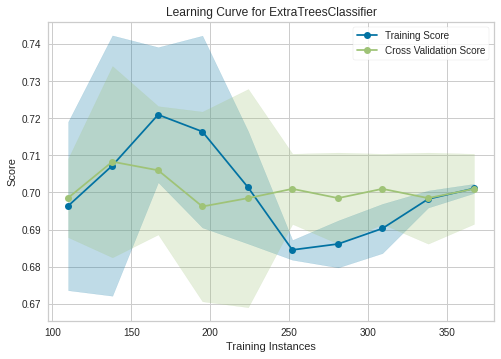

In [121]:
plot_model(et_model,plot='learning')

In [122]:
save_model(et_model,'livermodel')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Dataset',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                  ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                       class_weight={}, criterion='entropy',
                                       max_depth=6, max_features='sqrt',
                                       max_leaf_nodes